In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
df = pd.read_csv("xclara.csv")

In [37]:
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


<Axes: >

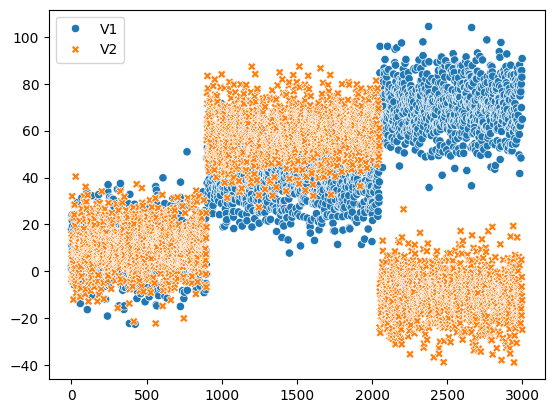

In [38]:
sns.scatterplot(df)

<Axes: xlabel='V1', ylabel='Count'>

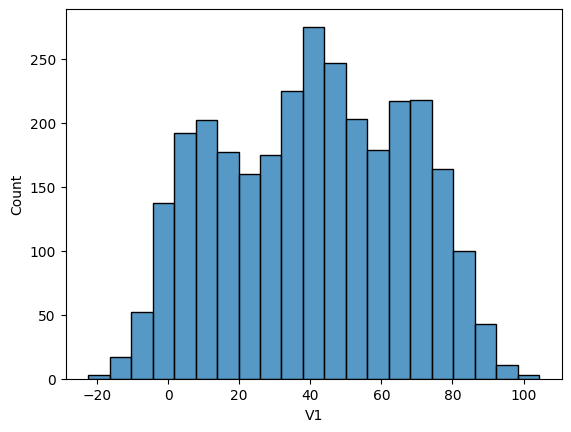

In [39]:
sns.histplot(df["V1"])

<Axes: xlabel='V2', ylabel='Count'>

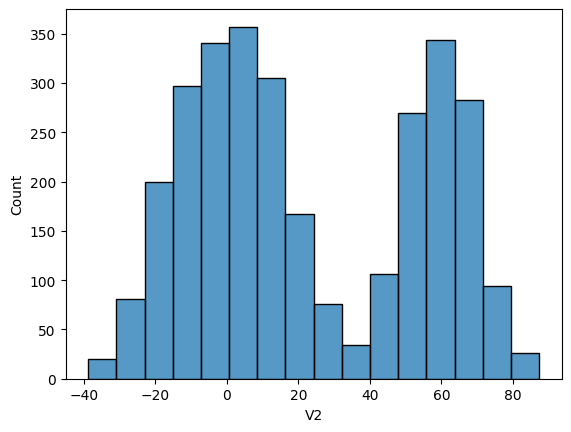

In [40]:
sns.histplot(df["V2"])

In [41]:
X = df.copy()

In [42]:
X = MinMaxScaler().fit_transform(X)

In [43]:
inertia_list, sil_score = [], []
n = [2,3,4,5,6,7,8,9,10]

for cluster in n:
    kmeans_instance = KMeans(n_clusters=cluster).fit(X)
    inertia_list.append(kmeans_instance.inertia_)
    sil_score.append(silhouette_score(X, kmeans_instance.labels_))

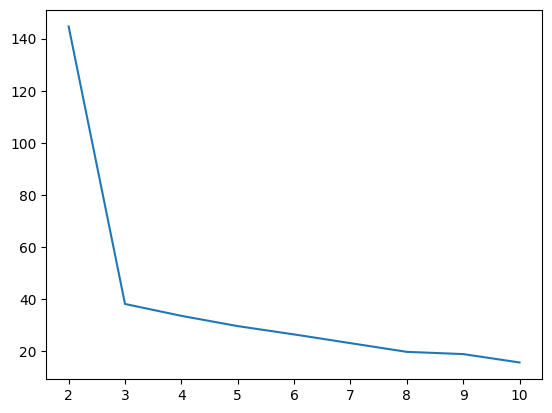

In [44]:
plt.plot(n, inertia_list)

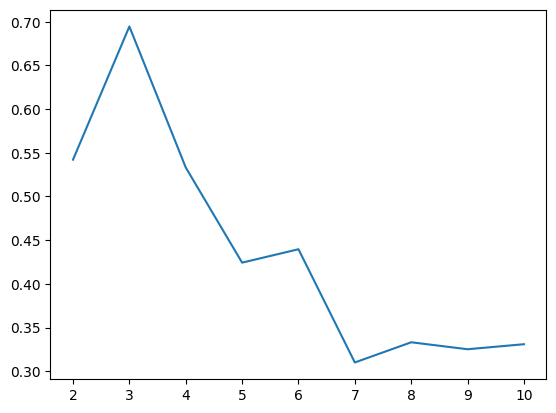

In [45]:
plt.plot(n, sil_score)

In [46]:
kmeans_instance = KMeans(n_clusters=3).fit(X)

In [47]:
y_pred = kmeans_instance.predict(X)

In [48]:
y_pred

array([2, 2, 2, ..., 0, 0, 0])

In [49]:
df["Cluster"] = y_pred

In [50]:
df.head()

,V1,V2,Cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2


In [51]:
df["Cluster"].unique()

array([2, 1, 0])

<Axes: xlabel='V1', ylabel='V2'>

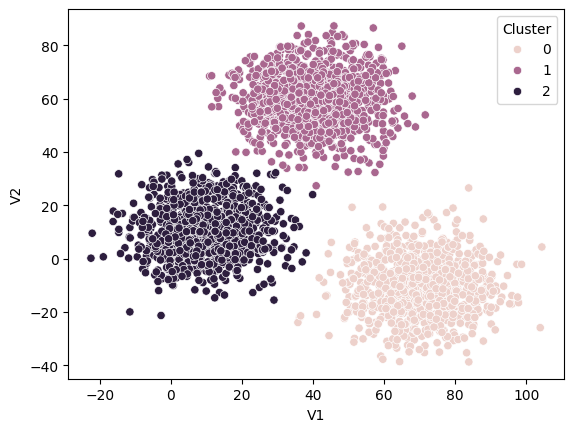

In [52]:
sns.scatterplot(x='V1', y='V2', data=df, hue='Cluster')